## Content from Aki Vehtari's BDA course
### Assignment 1
https://avehtari.github.io/BDA_course_Aalto/assignments/assignment1.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Q2**

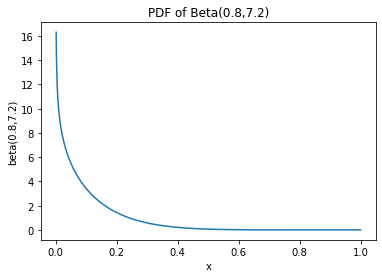

In [9]:
#2a
x = np.linspace(0,1,1000)
mu = 0.1
sigma_sqr = 0.01
alpha = mu*(mu*(1-mu)/sigma_sqr - 1)
beta = alpha*(1-mu)/mu
beta_dist = stats.beta.pdf(x, alpha, beta)
plt.plot(x, beta_dist)
plt.xlabel('x')
plt.ylabel('beta({},{})'.format(alpha, beta))
plt.title('PDF of Beta({},{})'.format(alpha, beta))
plt.show()

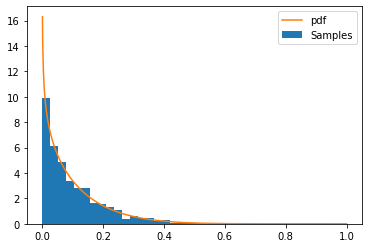

In [22]:
#2b
beta_sample = stats.beta.rvs(0.8, 7.2, size = 1000)
plt.hist(beta_sample, bins = 20,histtype='stepfilled', label = 'Samples', density = True)
plt.plot(x, beta_dist, label = 'pdf')
plt.legend()
plt.show()

In [25]:
#2c
mu_hat = np.average(beta_sample)
sigma_sqr_hat = np.var(beta_sample)
print('Sample Mean = {}'.format(round(mu_hat,3)))
print('Sample Variance = {}'.format(round(sigma_sqr_hat,3)))

Sample Mean = 0.099
Sample Variance = 0.009


In [38]:
#2d
lb = (1-.95)/2
ub = 1 - lb
interval_95 = stats.mstats.mquantiles(beta_sample, prob=[lb,ub])
interval_95
print('95% confidence interval = {}'.format(interval_95))

95% confidence interval = [0.00112786 0.35020843]


**Q3**

P(Test is positive | Patient has lung cancer) = 0.98 \
P(Test is negative | Patient has lung cancer) = 0.02 \
P(Test is negative | Patient does not have lung cancer) = 0.96 \
P(Test is positive | Patient does not have lung cancer) = 0.04 

P(Patient has Lung Cancer) = 0.001 \
P(Patient does not have Lung Cancer) = 0.999 

**P(Patient does not have lung cancer | Test is positive )**\
= (P(Test is positive | Patient does not have lung cancer) * P(Patient does not have Lung Cancer))/P(Test is positive) \
= 0.04 * 0.999 / (0.04 * 0.999 + 0.98 * 0.001) \
= **0.9760**

The methods will give false positive results and cost the patient huge sums due to expensive treatment and tests

**Q4**

In [42]:
#4a
a_r, a_w = 2, 5
b_r, b_w = 4, 1
c_r, c_w = 1, 3
pa, pb, pc = 0.4, 0.1, (1 - pa - pb)
pra = 2/7 # P(red|A selected)
prb = 4/5
prc = 1/4
pr = pra*pa + prb*pb + prc*pc
print('P(Choosing red ball) = {}'.format(round(pr,3)))

P(Choosing red ball) = 0.319


In [46]:
#4b
par = pra*pa/pr # P(A|red)
pbr = prb*pb/pr
pcr = prc*pc/pr
print('P(A|red) = {}\nP(B|red) = {}\nP(C|red) = {}'.format(par,pbr,pcr))

P(A|red) = 0.35794183445190153
P(B|red) = 0.25055928411633116
P(C|red) = 0.39149888143176736


Red ball most likely comes from box **C**

**Q5**

P(fraternal twins) = 1/150 \
P(identical twins) = 1/400 \
P(boy) = P(girl) = 1/2 \
P(having both boys | fraternal twins) = 1/4 \
P(having both boys | identical twins) = 1/2 \
P(identical twins | having twin brother) = \
= P(having both boys | identical twins) * P(identical twins)/P(having both boys)  \
= (1/2 * 1/400)/(1/2 * 1/400 + 1/4 * 1/150)   
= 0.429